## Clustering analysis with K-Means

In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import power_transform
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats.stats import pearsonr
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN 
from sklearn.metrics import pairwise_distances 
from sklearn.neighbors import NearestNeighbors 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics  

In [2]:
df = pd.read_csv(r'file:employees_attrition_clean.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,27.0,Yes,Travel_Frequently,763,Sales,15,2,Medical,1,Male,...,4,80.0,2,7,1.0,2,2.0,2,2,2
1,30.0,Yes,Travel_Rarely,1079,Sales,16,4,Marketing,1,Male,...,1,80.0,3,10,2.0,3,8.0,0,0,0
2,56.0,No,Non-Travel,150,Research & Development,2,4,Technical Degree,4,Male,...,3,80.0,1,12,2.0,2,13.0,3,1,4
3,41.0,Yes,Travel_Rarely,359,Human Resources,18,5,Human Resources,4,Male,...,3,80.0,0,2,4.0,3,3.0,0,0,0
4,42.0,No,Travel_Rarely,642,Research & Development,1,3,Life Sciences,4,Male,...,1,80.0,1,12,6.0,3,5.0,3,1,0


In [3]:
# Variables encoding
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['BusinessTravel'] = df['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No':0})
# Encoding categorical variables
df = pd.get_dummies(df, columns=['MaritalStatus'])

In [4]:
#Prima creo un df solo con gli attributi numerici
num_df = df.select_dtypes(exclude=['object'])
 
#Codice per ZSCORE - STANDARDIZZAZIONE 
stand_data = StandardScaler().fit(num_df)
stand_data = stand_data.transform(num_df)
stand_data = pd.DataFrame(num_df)
stand_data.columns = ['Age', 'Attrition' , 'BusinessTravel', 'DailyRate' , 'DistanceFromHome' , 'Education', 'EnvironmentSatisfaction' , 'HourlyRate', 'JobInvolvement' , 'JobLevel', 'JobSatisfaction', 'MonthlyIncome' , 'MonthlyRate' , 'NumCompaniesWorked' , 'OverTime' , 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single']
df = stand_data

#Errore! L'ultimo stand_data non è standardizzato. stand_data = pd.DataFrame(stand_data) è corretto

In [5]:
df = df.drop(columns = 'StandardHours')
df = df.drop(columns = 'HourlyRate')
df = df.drop(columns = 'DailyRate')
df = df.drop(columns = 'MonthlyRate')
df = df.drop(columns = 'BusinessTravel')
df = df.drop(columns = 'Education')
df = df.drop(columns = 'YearsInCurrentRole')
df = df.drop(columns = 'JobLevel')

# K-Means

## K-Means (Age, MonthlyIncome)

In [6]:
dk = df[['Age','MonthlyIncome']]
dk_scaled = dk

dk_scaled.head(5)

,Age,MonthlyIncome
0,27.0,4298.0
1,30.0,5304.0
2,56.0,6306.0
3,41.0,6430.0
4,42.0,2766.0


#### Ricerca di K

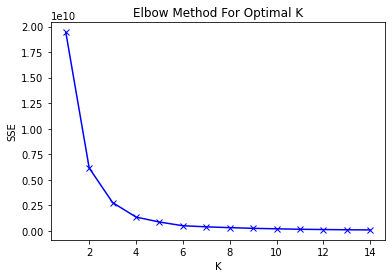

In [7]:
#Elbow method

sse = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dk_scaled)
    sse.append(km.inertia_)
    
plt.plot(K, sse, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal K')
plt.show()

In [8]:
#Silhouette metric

k_to_test = range(2,25,1) # [2,3,4, ..., 24]
silhouette_scores = {}

for k in k_to_test:
    kmeans = KMeans(n_clusters = k, random_state=123)
    kmeans.fit(dk_scaled)
    labels_k = kmeans.labels_
    score_k = metrics.silhouette_score(dk_scaled, labels_k)
    silhouette_scores[k] = score_k
    print("Tested kMeans with k = %d\tSS: %5.4f" % (k, score_k))

Tested kMeans with k = 2	SS: 0.6997
Tested kMeans with k = 3	SS: 0.5993
Tested kMeans with k = 4	SS: 0.6358
Tested kMeans with k = 5	SS: 0.6186
Tested kMeans with k = 6	SS: 0.6413
Tested kMeans with k = 7	SS: 0.6119
Tested kMeans with k = 8	SS: 0.5949
Tested kMeans with k = 9	SS: 0.5927
Tested kMeans with k = 10	SS: 0.5830
Tested kMeans with k = 11	SS: 0.5737
Tested kMeans with k = 12	SS: 0.5742
Tested kMeans with k = 13	SS: 0.5648
Tested kMeans with k = 14	SS: 0.5601
Tested kMeans with k = 15	SS: 0.5724
Tested kMeans with k = 16	SS: 0.5734
Tested kMeans with k = 17	SS: 0.5836
Tested kMeans with k = 18	SS: 0.5909
Tested kMeans with k = 19	SS: 0.5841
Tested kMeans with k = 20	SS: 0.5888
Tested kMeans with k = 21	SS: 0.6083
Tested kMeans with k = 22	SS: 0.6062
Tested kMeans with k = 23	SS: 0.5958
Tested kMeans with k = 24	SS: 0.5904


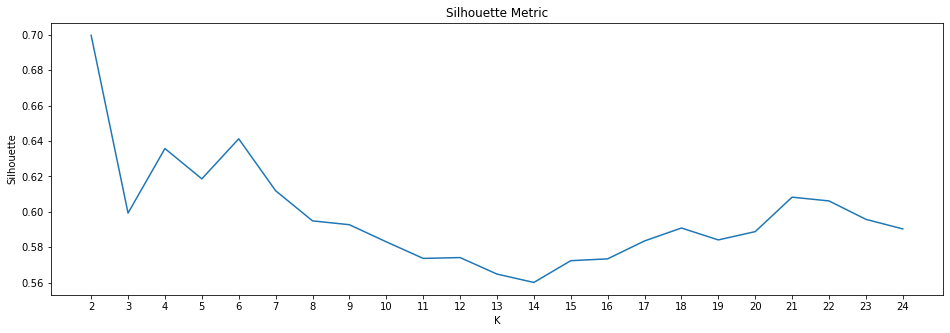

In [9]:
#Visualizziamo la silhouette

sil_scores = list(silhouette_scores.values())

plt.figure(figsize = (16,5))
plt.plot(sil_scores)
plt.xticks(range(0,23,1), silhouette_scores.keys())
plt.title("Silhouette Metric")
plt.xlabel("K")
plt.ylabel("Silhouette")
plt.show()


In [10]:
kmeans = KMeans(n_clusters = 4, max_iter=5000, random_state=123)
kmeans.fit(dk_scaled)
centroids = kmeans.cluster_centers_
dk_scaled['label'] = kmeans.labels_
dk['label'] = kmeans.labels_

<ipython-input-10-9cb795876cd2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dk_scaled['label'] = kmeans.labels_
<ipython-input-10-9cb795876cd2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dk['label'] = kmeans.labels_


In [11]:
cc0 = 0
cc1 = 0
cc2 = 0
cc3 = 0
for i in dk_scaled['label']:
    if i == 0:
        cc0 += 1
    elif i == 1:
        cc1 += 1
    elif i == 2:
        cc2 += 1
    elif i == 3:
        cc3 += 1
        
print(cc0,cc1,cc2,cc3)

600 73 514 159


In [12]:
centroids 

array([[   36.92731698,  6270.16843792],
       [   45.93697939, 17383.        ],
       [   33.80034895,  3052.67446394],
       [   40.83434399, 11127.46540881]])

In [13]:
#Per visualizzare k-means 

#sns.pairplot(data = dk_scaled, hue = "label", palette = "Accent_r")
#plt.show()

In [14]:
#Funzione per jitter

def rand_jitter(arr):
    stdev = .04*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

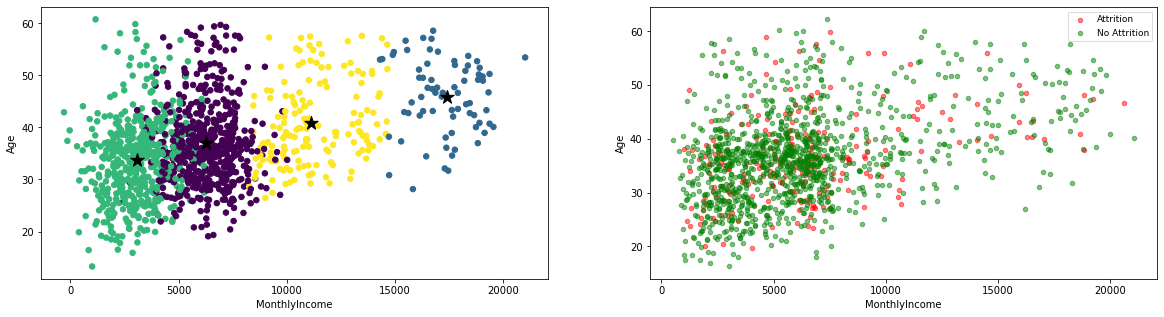

In [15]:
fig = plt.figure(figsize=(20, 5)) 
fig_dims = (1, 2)

plt.subplot2grid(fig_dims, (0, 0))
plt.scatter(rand_jitter(dk_scaled['MonthlyIncome']), rand_jitter(dk_scaled['Age']), c=kmeans.labels_, s=30)
#plt.tick_params(axis='both', which='major', labelsize=22)
plt.ylabel('Age')
plt.xlabel('MonthlyIncome')
plt.scatter(centroids[:,1], centroids[:,0], s=200, marker='*', c='k')

plt.subplot2grid(fig_dims, (0, 1))
plt.scatter(rand_jitter(dk['MonthlyIncome'].loc[df['Attrition'] == 1]), rand_jitter(dk['Age'].loc[df['Attrition'] == 1]), s = 20, c = 'red',alpha =0.5, label = 'Attrition')
plt.scatter(rand_jitter(dk['MonthlyIncome'].loc[df['Attrition'] == 0]), rand_jitter(dk['Age'].loc[df['Attrition'] == 0]), s = 20, c = 'green',alpha =0.5, label = 'No Attrition')
plt.ylabel('Age')
plt.xlabel('MonthlyIncome')
plt.legend(fontsize = 9, framealpha=0.7)


plt.show()

## K-Means (TotalWorkingYears, MonthlyIncome)

In [16]:
dk = df[['TotalWorkingYears','MonthlyIncome']]
dk_scaled = dk

dk_scaled.head(5)

,TotalWorkingYears,MonthlyIncome
0,7,4298.0
1,10,5304.0
2,12,6306.0
3,2,6430.0
4,12,2766.0


In [17]:
kmeans = KMeans(n_clusters = 4, max_iter=5000, random_state=123)
kmeans.fit(dk_scaled)
centroids = kmeans.cluster_centers_
dk_scaled['label'] = kmeans.labels_
dk['label'] = kmeans.labels_

<ipython-input-17-9cb795876cd2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dk_scaled['label'] = kmeans.labels_
<ipython-input-17-9cb795876cd2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dk['label'] = kmeans.labels_


In [18]:
centroids

array([[1.01713810e+01, 6.27016844e+03],
       [9.76712329e+00, 1.73830000e+04],
       [1.04795322e+01, 3.05267446e+03],
       [1.14213836e+01, 1.11274654e+04]])

In [19]:
#Per visualizzare k-means 

#sns.pairplot(data = dk_scaled, hue = "label", palette = "Accent_r")
#plt.show()

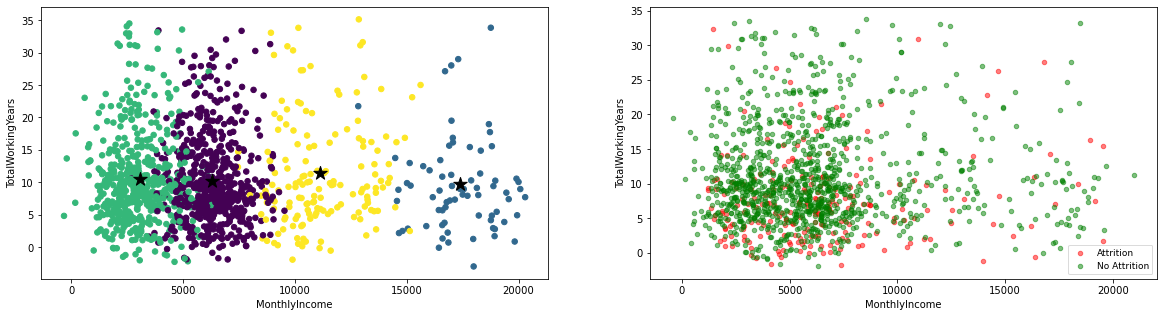

In [20]:
fig = plt.figure(figsize=(20, 5)) 
fig_dims = (1, 2)

plt.subplot2grid(fig_dims, (0, 0))
plt.scatter(rand_jitter(dk_scaled['MonthlyIncome']), rand_jitter(dk_scaled['TotalWorkingYears']), c=kmeans.labels_, s=30)
#plt.tick_params(axis='both', which='major', labelsize=22)
plt.ylabel('TotalWorkingYears')
plt.xlabel('MonthlyIncome')
plt.scatter(centroids[:,1], centroids[:,0], s=200, marker='*', c='k')

plt.subplot2grid(fig_dims, (0, 1))
plt.scatter(rand_jitter(dk['MonthlyIncome'].loc[df['Attrition'] == 1]), rand_jitter(dk['TotalWorkingYears'].loc[df['Attrition'] == 1]), s = 20, c = 'red',alpha =0.5, label = 'Attrition')
plt.scatter(rand_jitter(dk['MonthlyIncome'].loc[df['Attrition'] == 0]), rand_jitter(dk['TotalWorkingYears'].loc[df['Attrition'] == 0]), s = 20, c = 'green',alpha =0.5, label = 'No Attrition')
plt.ylabel('TotalWorkingYears')
plt.xlabel('MonthlyIncome')
plt.legend(fontsize = 9, framealpha=0.7)

plt.show()

## K-Means (YearsWithCurrManager, MonthlyIncome)

In [21]:
dk = df[['YearsWithCurrManager','MonthlyIncome']]
dk_scaled = dk

dk_scaled.head(5)

,YearsWithCurrManager,MonthlyIncome
0,2,4298.0
1,0,5304.0
2,4,6306.0
3,0,6430.0
4,0,2766.0


In [22]:
kmeans = KMeans(n_clusters = 4, max_iter=5000, random_state=123)
kmeans.fit(dk_scaled)
centroids = kmeans.cluster_centers_
dk_scaled['label'] = kmeans.labels_
dk['label'] = kmeans.labels_

<ipython-input-22-9cb795876cd2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dk_scaled['label'] = kmeans.labels_
<ipython-input-22-9cb795876cd2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dk['label'] = kmeans.labels_


In [23]:
centroids

array([[3.65723794e+00, 6.27016844e+03],
       [3.36986301e+00, 1.73830000e+04],
       [3.90253411e+00, 3.05267446e+03],
       [4.17610063e+00, 1.11274654e+04]])

In [24]:
#Per visualizzare k-means 

#sns.pairplot(data = dk_scaled, hue = "label", palette = "Accent_r")
#plt.show()

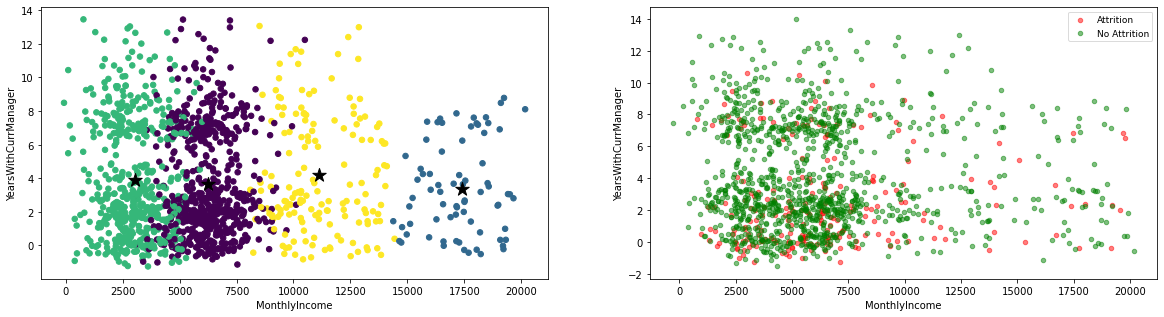

In [25]:
fig = plt.figure(figsize=(20, 5)) 
fig_dims = (1, 2)

plt.subplot2grid(fig_dims, (0, 0))
plt.scatter(rand_jitter(dk_scaled['MonthlyIncome']), rand_jitter(dk_scaled['YearsWithCurrManager']), c=kmeans.labels_, s=30)
#plt.tick_params(axis='both', which='major', labelsize=22)
plt.ylabel('YearsWithCurrManager')
plt.xlabel('MonthlyIncome')
plt.scatter(centroids[:,1], centroids[:,0], s=200, marker='*', c='k')

plt.subplot2grid(fig_dims, (0, 1))
plt.scatter(rand_jitter(dk['MonthlyIncome'].loc[df['Attrition'] == 1]), rand_jitter(dk['YearsWithCurrManager'].loc[df['Attrition'] == 1]), s = 20, c = 'red',alpha =0.5, label = 'Attrition')
plt.scatter(rand_jitter(dk['MonthlyIncome'].loc[df['Attrition'] == 0]), rand_jitter(dk['YearsWithCurrManager'].loc[df['Attrition'] == 0]), s = 20, c = 'green',alpha =0.5, label = 'No Attrition')
plt.ylabel('YearsWithCurrManager')
plt.xlabel('MonthlyIncome')
plt.legend(fontsize = 9, framealpha=0.7)

plt.show()

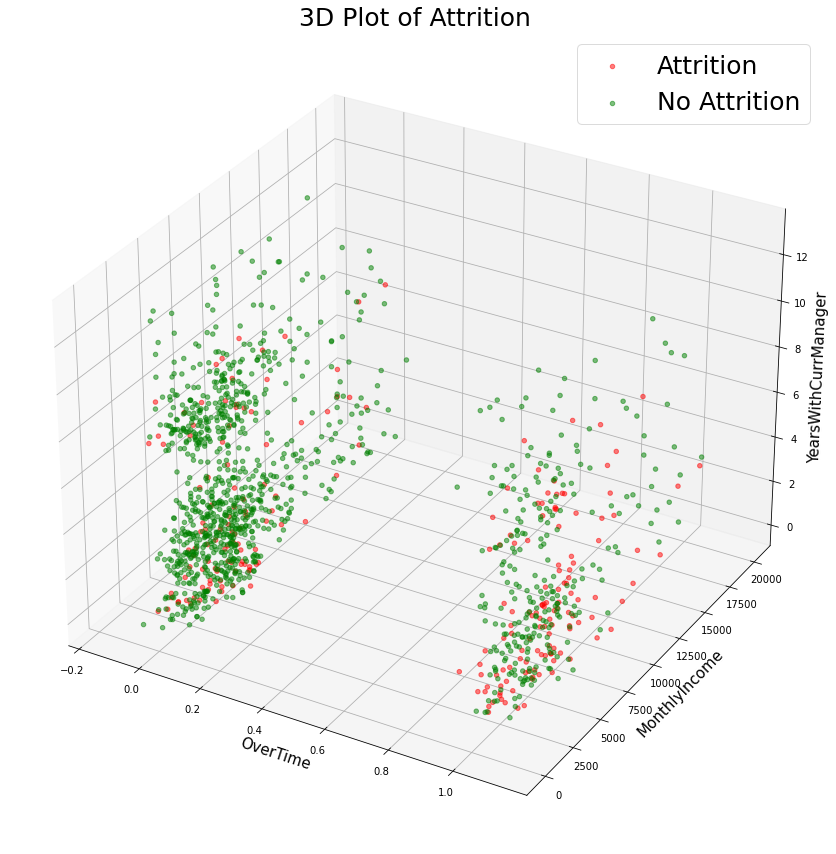

In [26]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rand_jitter(df['OverTime'].loc[df['Attrition'] == 1]),rand_jitter(dk_scaled['MonthlyIncome'].loc[df['Attrition'] == 1]),dk_scaled['YearsWithCurrManager'].loc[df['Attrition'] == 1], s = 20, c = 'red',alpha =0.5, label = 'Attrition')
ax.scatter(rand_jitter(df['OverTime'].loc[df['Attrition'] == 0]),rand_jitter(dk_scaled['MonthlyIncome'].loc[df['Attrition'] == 0]),dk_scaled['YearsWithCurrManager'].loc[df['Attrition'] == 0], s = 20, c = 'green',alpha =0.5, label = 'No Attrition')

ax.set_xlabel('OverTime', fontsize=15)
ax.set_ylabel('MonthlyIncome',fontsize=15)
ax.set_zlabel('YearsWithCurrManager',fontsize=15)
plt.legend(fontsize = 25, framealpha=0.7)
plt.title('3D Plot of Attrition',fontsize=25)

plt.show()

### For the report

In [27]:
dk = df[['Age','MonthlyIncome','TotalWorkingYears','YearsWithCurrManager']]
dk_scaled = dk

dk_scaled.head(5)

,Age,MonthlyIncome,TotalWorkingYears,YearsWithCurrManager
0,27.0,4298.0,7,2
1,30.0,5304.0,10,0
2,56.0,6306.0,12,4
3,41.0,6430.0,2,0
4,42.0,2766.0,12,0


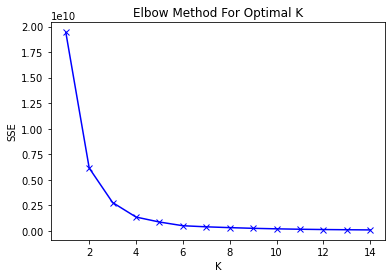

In [28]:
#Elbow method

sse = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dk_scaled)
    sse.append(km.inertia_)
    
plt.plot(K, sse, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal K')
plt.show()

In [29]:
#Silhouette metric

k_to_test = range(2,25,1) # [2,3,4, ..., 24]
silhouette_scores = {}

for k in k_to_test:
    kmeans = KMeans(n_clusters = k, random_state=123)
    kmeans.fit(dk_scaled)
    labels_k = kmeans.labels_
    score_k = metrics.silhouette_score(dk_scaled, labels_k)
    silhouette_scores[k] = score_k
    print("Tested kMeans with k = %d\tSS: %5.4f" % (k, score_k))

Tested kMeans with k = 2	SS: 0.6997
Tested kMeans with k = 3	SS: 0.5992
Tested kMeans with k = 4	SS: 0.6357
Tested kMeans with k = 5	SS: 0.6185
Tested kMeans with k = 6	SS: 0.6411
Tested kMeans with k = 7	SS: 0.6116
Tested kMeans with k = 8	SS: 0.5953
Tested kMeans with k = 9	SS: 0.5932
Tested kMeans with k = 10	SS: 0.5826
Tested kMeans with k = 11	SS: 0.5731
Tested kMeans with k = 12	SS: 0.5735
Tested kMeans with k = 13	SS: 0.5640
Tested kMeans with k = 14	SS: 0.5591
Tested kMeans with k = 15	SS: 0.5710
Tested kMeans with k = 16	SS: 0.5722
Tested kMeans with k = 17	SS: 0.5847
Tested kMeans with k = 18	SS: 0.5894
Tested kMeans with k = 19	SS: 0.5861
Tested kMeans with k = 20	SS: 0.5873
Tested kMeans with k = 21	SS: 0.6061
Tested kMeans with k = 22	SS: 0.5815
Tested kMeans with k = 23	SS: 0.5923
Tested kMeans with k = 24	SS: 0.5879


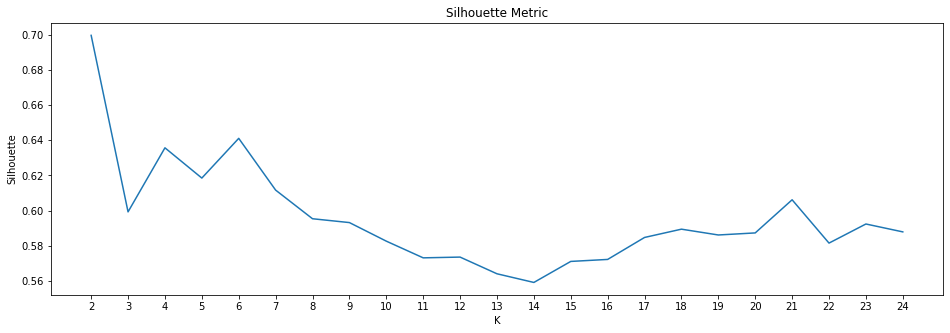

In [30]:
#Visualizziamo la silhouette

sil_scores = list(silhouette_scores.values())

plt.figure(figsize = (16,5))
plt.plot(sil_scores)
plt.xticks(range(0,23,1), silhouette_scores.keys())
plt.title("Silhouette Metric")
plt.xlabel("K")
plt.ylabel("Silhouette")
plt.show()


In [31]:
kmeans = KMeans(n_clusters = 4, max_iter=5000, random_state=123)
kmeans.fit(dk_scaled)
centroids = kmeans.cluster_centers_
dk_scaled['label'] = kmeans.labels_
dk['label'] = kmeans.labels_

<ipython-input-31-9cb795876cd2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dk_scaled['label'] = kmeans.labels_
<ipython-input-31-9cb795876cd2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dk['label'] = kmeans.labels_


In [32]:
#Facciamo il logaritmo per presentarli graficamente 

centroids = np.log(centroids, dtype='float64')

centroids

array([[3.60895157, 8.7435585 , 2.319578  , 1.2967082 ],
       [3.82727044, 9.763248  , 2.27902198, 1.21487209],
       [3.52047113, 8.02377336, 2.34942404, 1.36162611],
       [3.70952349, 9.31717169, 2.43548736, 1.42937795]])

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (5).

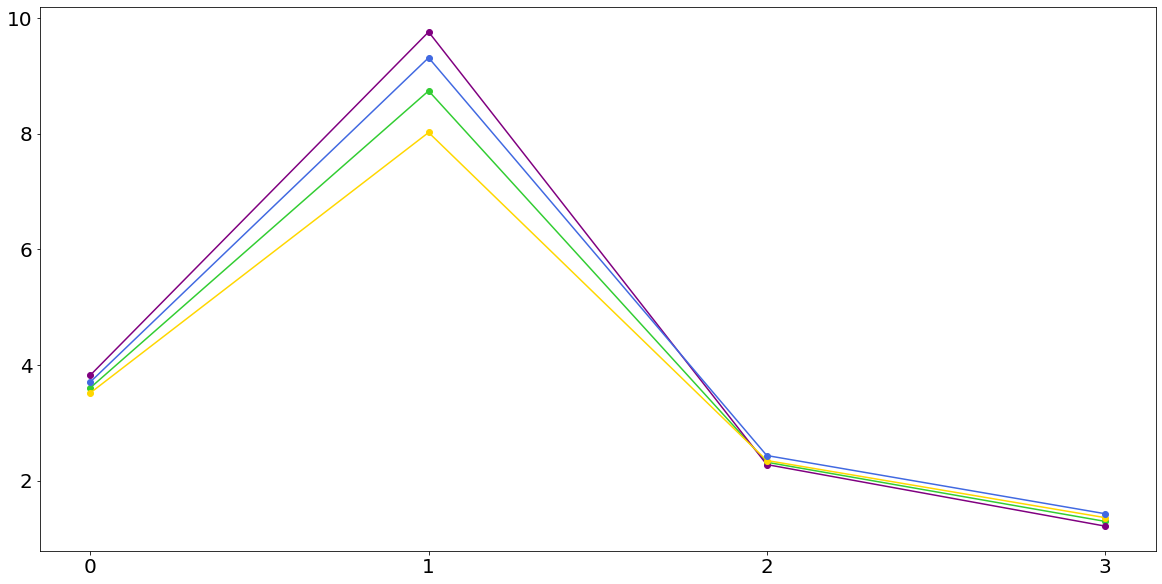

In [33]:
#Visualization of clusters centers by means of parallel coordinates

#Attenzione a fare un run solo, altrimenti cerca altri centers e cambia il grafico

fig = plt.figure(figsize=(20, 10)) 
fig_dims = (1, 1)

# Plot 
plt.subplot2grid(fig_dims, (0, 0))
plt.plot(centroids[0,:], marker='o', label='Cluster 1', color = 'limegreen')
plt.plot(centroids[1,:], marker='o', label='Cluster 2', color = 'purple')
plt.plot(centroids[2,:], marker='o', label='Cluster 3', color = 'gold')
plt.plot(centroids[3,:], marker='o', label='Cluster 4', color = 'royalblue')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(range(0, len(dk_scaled.columns)-1), dk_scaled.columns, fontsize=15)
plt.legend(fontsize=20)
plt.show()